In [325]:
import warnings
warnings.filterwarnings('ignore')

#basic libraries

import numpy as np
import pandas as pd

#visualization libraries

import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
%matplotlib inline
import pickle

In [326]:
df = pd.read_excel("/content/sample_data/OSMI_updated.xlsx")

In [327]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:00,37,Female,United States,IL,NaN,No,Yes,Often,45809,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:00,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:00,32,Male,Canada,NaN,NaN,No,No,Rarely,45809,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:00,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:00,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 0 to 1495
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  1259 non-null   datetime64[ns]
 1   Age                        1496 non-null   int64         
 2   Gender                     1494 non-null   object        
 3   Country                    1496 non-null   object        
 4   state                      813 non-null    object        
 5   self_employed              1478 non-null   object        
 6   family_history             1496 non-null   object        
 7   treatment                  1496 non-null   object        
 8   work_interfere             1192 non-null   object        
 9   no_employees               1443 non-null   object        
 10  remote_work                1363 non-null   object        
 11  tech_company               1476 non-null   object        
 12  benefi

In [329]:
print(df['Country'].value_counts())
print("\n \n")
print(df['state'].unique())

United States               751
United Kingdom              190
Canada                       76
Bangladesh                   56
Germany                      53
United States of America     53
Bangladesh                   40
India                        31
Netherlands                  29
Ireland                      27
Australia                    23
Brazil                       14
France                       13
Italy                        10
Switzerland                   9
Poland                        9
South Africa                  8
New Zealand                   8
Slovenia                      8
Sweden                        7
Israel                        7
Belgium                       6
Bulgaria                      5
Macedonia                     4
Singapore                     4
Finland                       4
Austria                       4
Greece                        3
Russia                        3
Portugal                      3
Mexico                        3
Colombia

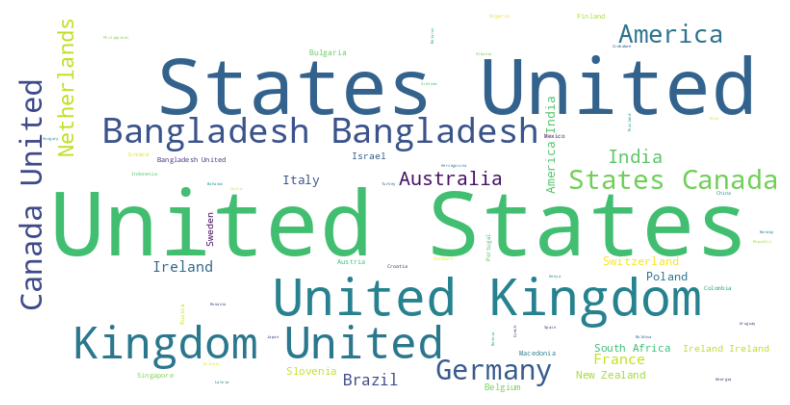

In [330]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
df['Country'] = df['Country'].astype(str)  # Convert the 'Country' column to strings

# Remove missing values
df = df.dropna(subset=['Country'])

text = " ".join(country for country in df['Country'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [331]:
# Assuming your dataset is stored in an Excel file named 'OSMI_updated.xlsx'
df = pd.read_excel('/content/sample_data/OSMI_updated.xlsx')

# Check the distribution of the 'treatment' column
balance_check = df['treatment'].value_counts()

# Print the distribution
print(balance_check)

No     788
Yes    708
Name: treatment, dtype: int64


In [332]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Assuming your dataset is stored in an Excel file named 'OSMI_updated.xlsx'
df = pd.read_excel('/content/sample_data/OSMI_updated.xlsx')

# Convert datetime columns to numeric representation
df['Timestamp'] = pd.to_numeric(df['Timestamp'])

# # Check the distribution of the 'treatment' column before balancing
# print("Before balancing:")
# print(df['treatment'].value_counts())

# Separate features and target variable
X = df.drop('treatment', axis=1)
y = df['treatment']

# Instantiate the random oversampler
oversampler = RandomOverSampler(random_state=42)

# Fit and apply the random oversampler
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Combine the resampled data into a new DataFrame
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Check the distribution of the 'treatment' column after balancing
print("\nAfter balancing:")
print(df_resampled['treatment'].value_counts())


After balancing:
Yes    788
No     788
Name: treatment, dtype: int64


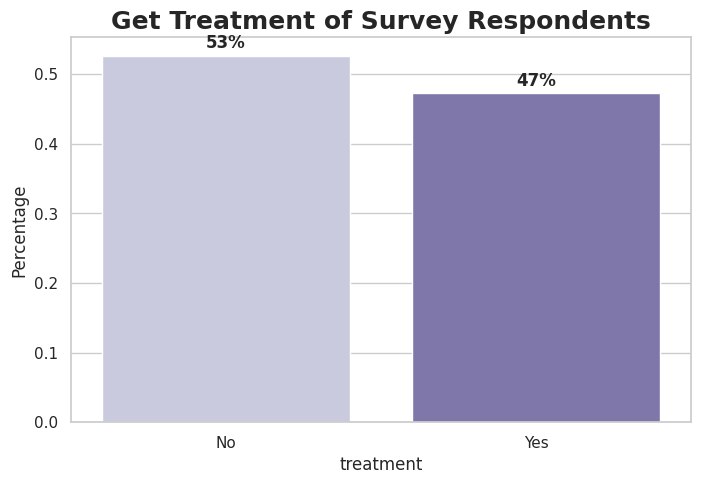

In [333]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Get Treatment of Survey Respondents', fontsize=18, fontweight='bold')
eda_percentage = df['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10), palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
    #My dataset are balanced

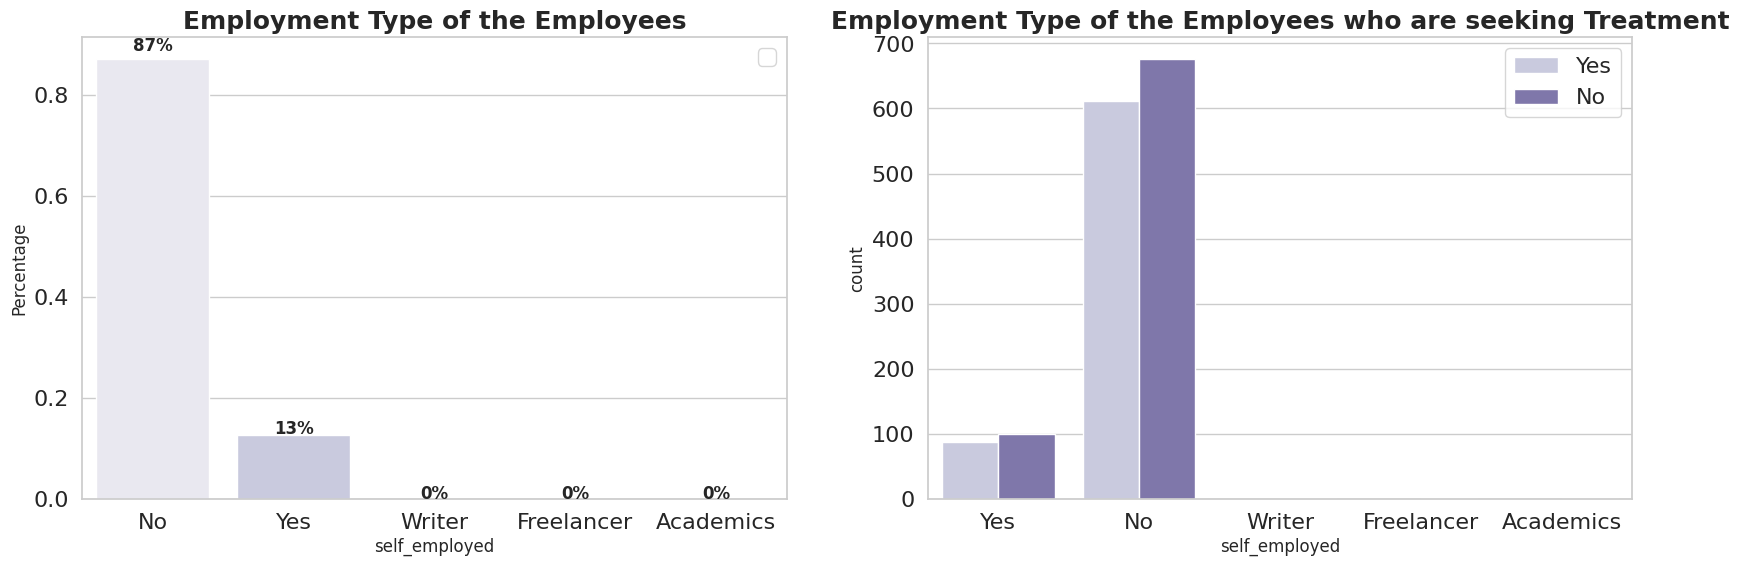

In [334]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
eda_percentage = df['self_employed'].value_counts(normalize=True).rename_axis('self_employed').reset_index(name='Percentage')
ax = sns.barplot(x='self_employed', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Employment Type of the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1, 2, 2)
sns.countplot(x='self_employed', hue='treatment', data=df, palette='Purples')
plt.title('Employment Type of the Employees who are seeking Treatment', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

In [335]:
df.drop(columns=['Timestamp', 'Country', 'state', 'comments'], inplace = True)

In [336]:
df.drop(df[df['Age'] < 0].index, inplace = True)
df.drop(df[df['Age'] > 100].index, inplace = True)
df['Age'].unique()#Here age cannot be negative and can't be more than 100, so we are droping those rows

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72, 63, 59, 15])

In [337]:
#Data Preprocessing

df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make','male/he/him','cis-het male','MALE','Masculine',
                      ], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman','Female (cis)','FEMALE',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman','afab non-binary','b','homem cis','Non-binary',
                      'Non-binary/Agender','Prefer not to say',], 'Other', inplace = True)

df['Gender'].value_counts()#here we are trying to train our model using only Male ,female and other database, expect those which are of diff meaning. so we are replacing those names with male and female others


Male      1106
Female     357
Other       26
Name: Gender, dtype: int64

In [338]:
#data preprocessing
df['no_employees'].replace(['101-500',], '100-500', inplace = True)
df['no_employees'].replace(['25-100',], '26-100', inplace = True)
df['no_employees'].replace(['more than that',], 'More than 1000', inplace = True)
df['no_employees'].replace(['None','Not working','none','No',"I don't have any",
                            "I dont work in a company or establishment",'I dont work',"I'm not any company owner. ",
                            "I don't work","Not self employed ","None ",'Not employed at this moment.'], 'NA', inplace = True)
df['no_employees'].replace(['Four',], 'Fewer than 25', inplace = True)
df['no_employees'].replace({0: 'Fewer than 25'}, inplace=True)
df['no_employees'].replace({45809: 'More than 1000', 45047: 'More than 1000'}, inplace=True)
df['coworkers'].replace(['Yes, No',], 'NA', inplace = True)
df['leave'].replace([' ',],'Difficult',inplace=True)

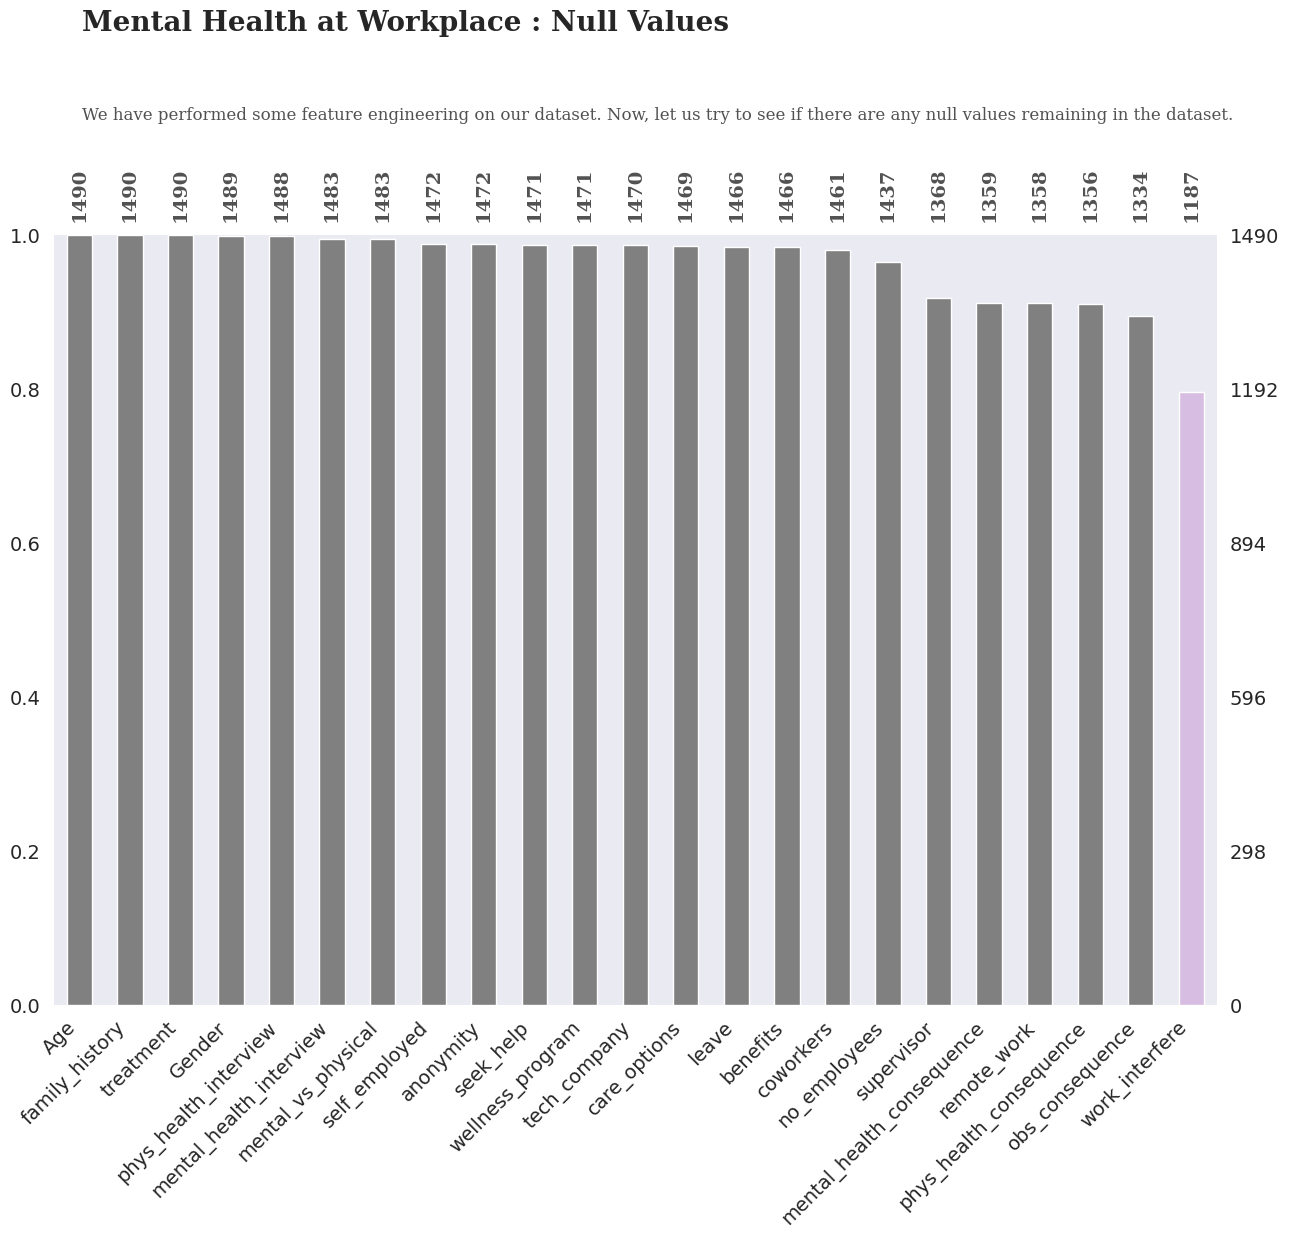

In [339]:
sns.set_style('dark')
color = ['grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey', 'grey','grey','grey','grey','grey','grey', 'grey','grey','grey','grey','#D7BDE2']
msno.bar(df,fontsize =14, color = color, sort = 'descending', figsize = (15,10))

plt.text(0.05,1.265,'Mental Health at Workplace : Null Values', {'font':'serif', 'size':20, 'weight':'bold'})
plt.text(0.05,1.15,'''We have performed some feature engineering on our dataset. Now, let us try to see if there are any null values remaining in the dataset.''', {'font':'serif', 'size':12, 'weight':'normal'}, alpha = 0.8)
plt.xticks( rotation = 90,
                   **{'font':'serif','size':14,'weight':'bold','horizontalalignment': 'center'},alpha = 0.8)

plt.show()

In [340]:
# Find the number of non-null values
non_null_count = df['work_interfere'].notnull().sum()

# Find the number of null values
null_count = df['work_interfere'].isnull().sum()

print("Number of non-null values in the 'work_interference' column:", non_null_count)
print("Number of null values in the 'work_interference' column:", null_count)

Number of non-null values in the 'work_interference' column: 1187
Number of null values in the 'work_interference' column: 303


In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1490 entries, 0 to 1495
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1490 non-null   int64 
 1   Gender                     1489 non-null   object
 2   self_employed              1472 non-null   object
 3   family_history             1490 non-null   object
 4   treatment                  1490 non-null   object
 5   work_interfere             1187 non-null   object
 6   no_employees               1437 non-null   object
 7   remote_work                1358 non-null   object
 8   tech_company               1470 non-null   object
 9   benefits                   1466 non-null   object
 10  care_options               1469 non-null   object
 11  wellness_program           1471 non-null   object
 12  seek_help                  1471 non-null   object
 13  anonymity                  1472 non-null   object
 14  leave   

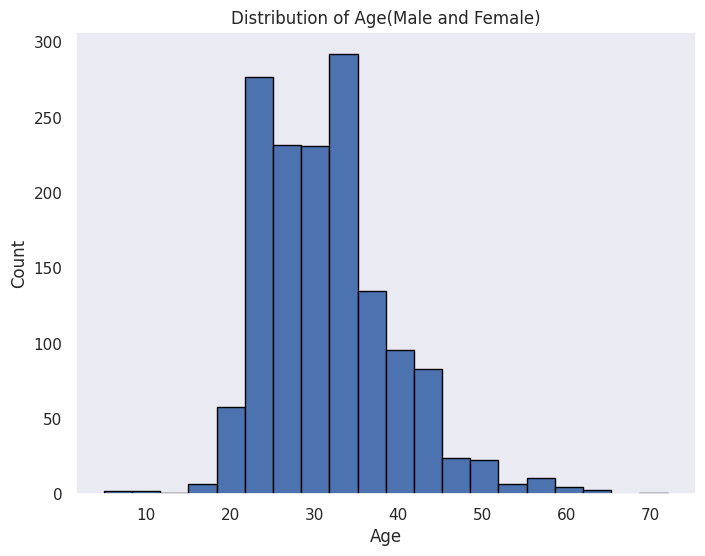

In [342]:
#'Age'
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age(Male and Female)')
plt.show()

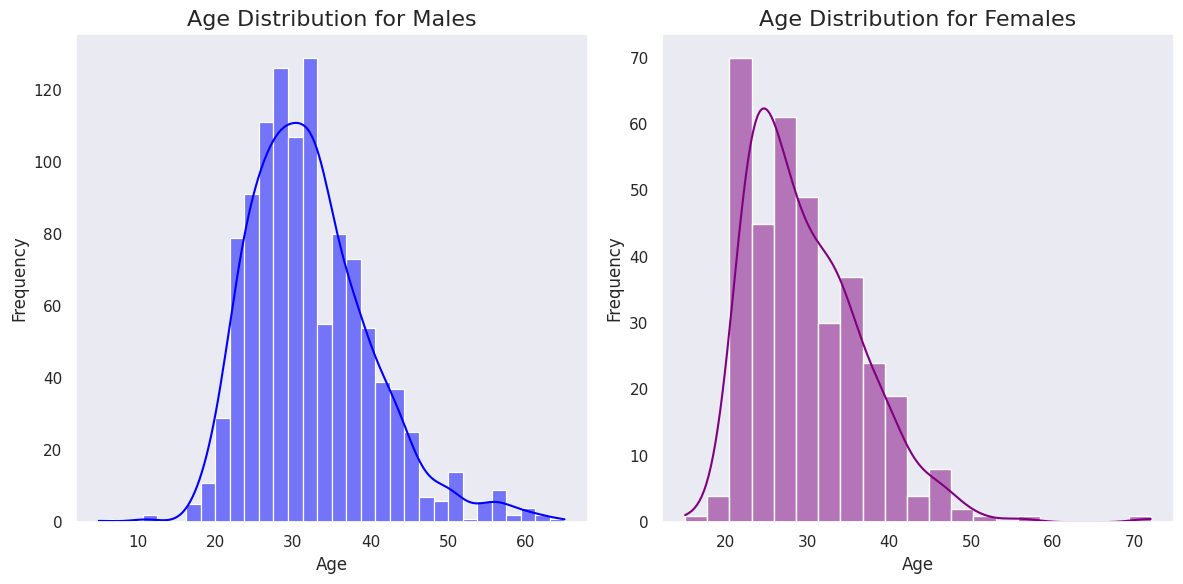

In [343]:
# Filter the DataFrame for male and female employees
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

plt.figure(figsize=(12, 6))

# Plot histogram for males
plt.subplot(1, 2, 1)
sns.histplot(data=male_data, x='Age', kde=True, color='blue')
plt.title('Age Distribution for Males', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Plot histogram for females
plt.subplot(1, 2, 2)
sns.histplot(data=female_data, x='Age', kde=True, color='purple')
plt.title('Age Distribution for Females', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()
#Histogram for Numerical features

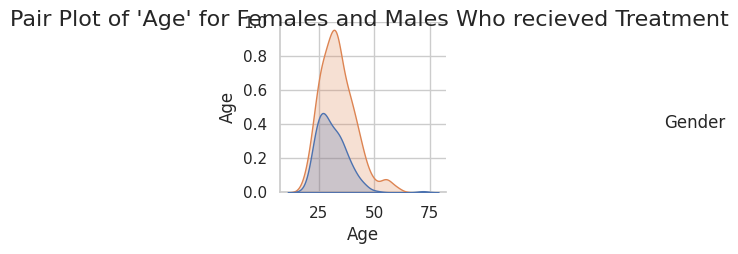

In [344]:
#Dataframe df with 'Gender','Age','treatment' columns

#Filter the dataFrame for females and males seperately
female_data=df[df['Gender']=='Female']
male_data=df[df['Gender']=='Male']

#Filter the dataFrame for females and males seperately
female_treatment_data=female_data[female_data['treatment']=='Yes']
male_treatment_data=male_data[male_data['treatment']=='Yes']

#Combine the filtered data
selected_data=pd.concat([female_treatment_data,male_treatment_data])

#Create a pair plot for 'Age' and 'treatment' with different colors for female and males
sns.set(style="whitegrid")

#Create a pair plot
pair_plot = sns.pairplot(data=selected_data, hue='Gender', vars=['Age'])
pair_plot._legend.set_title('Gender')

pair_plot.fig.suptitle("Pair Plot of 'Age' for Females and Males Who recieved Treatment",fontsize=16)
plt.show()

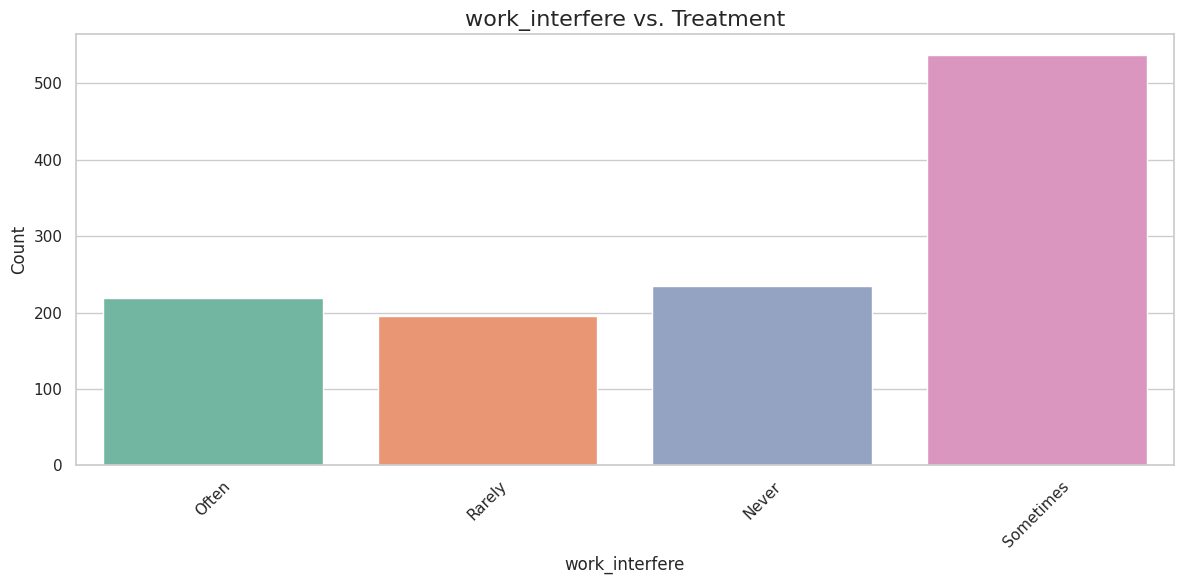

In [345]:
categorical_feature = 'work_interfere'

plt.figure(figsize=(12, 6))

# Create a count plot (bar plot) for the selected categorical feature
sns.countplot(data=df, x=categorical_feature, palette='Set2', hue_order=['Yes', 'No'])

plt.title(f'{categorical_feature} vs. Treatment', fontsize=16)
plt.xlabel(categorical_feature, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
#Categorical vs categorical

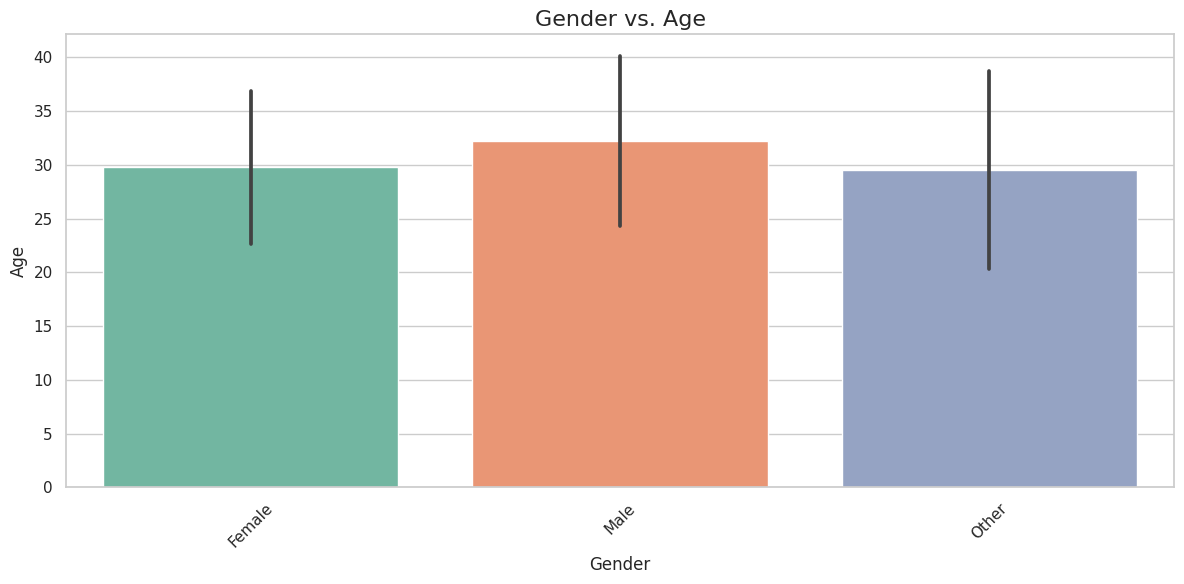

In [346]:
# categorical feature (e.g., 'Gender') and a numerical feature (e.g., 'Age')
categorical_feature = 'Gender'
numerical_feature = 'Age'

plt.figure(figsize=(12, 6))

# Create a bar plot for the selected categorical feature against the mean of the numerical feature
sns.barplot(data=df, x=categorical_feature, y=numerical_feature, ci="sd", palette='Set2')

plt.title(f'{categorical_feature} vs. {numerical_feature}', fontsize=16)
plt.xlabel(categorical_feature, fontsize=12)
plt.ylabel(numerical_feature, fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
#categorical vs numerical

In [347]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['work_interfere'].fillna('NA', inplace=True)
df['Gender'].fillna('Other', inplace=True)
df['no_employees'].fillna('NA', inplace=True)
df['mental_health_consequence'].fillna('Maybe', inplace=True)
df['phys_health_consequence'].fillna('Maybe', inplace=True)
df['remote_work'].fillna('NA', inplace=True)
df['tech_company'].fillna("Don't know", inplace=True)
df['benefits'].fillna("Don't know", inplace=True)
df['care_options'].fillna('Not sure', inplace=True)
df['seek_help'].fillna("Don't know", inplace=True)
df['anonymity'].fillna("Don't know", inplace=True)
df['coworkers'].fillna('NA', inplace=True)
df['supervisor'].fillna('NA', inplace=True)
df['wellness_program'].fillna("Don't know", inplace=True)
df['no_employees'].fillna('NA', inplace=True)
df['leave'].fillna('Difficult', inplace=True)
df['mental_health_interview'].fillna('Maybe', inplace=True)
df['obs_consequence'].fillna('NA', inplace=True)
df['mental_vs_physical'].fillna("Don't know", inplace=True)
df['phys_health_interview'].fillna("Maybe", inplace=True)
#missing data handling

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1490 entries, 0 to 1495
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1490 non-null   int64 
 1   Gender                     1490 non-null   object
 2   self_employed              1472 non-null   object
 3   family_history             1490 non-null   object
 4   treatment                  1490 non-null   object
 5   work_interfere             1490 non-null   object
 6   no_employees               1490 non-null   object
 7   remote_work                1490 non-null   object
 8   tech_company               1490 non-null   object
 9   benefits                   1490 non-null   object
 10  care_options               1490 non-null   object
 11  wellness_program           1490 non-null   object
 12  seek_help                  1490 non-null   object
 13  anonymity                  1490 non-null   object
 14  leave   

In [349]:
categorical_columns = ['Gender', 'work_interfere', 'seek_help']

# Use pandas get_dummies to perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [350]:
df_encoded.head()

,Age,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,...,mental_vs_physical,obs_consequence,Gender_Male,Gender_Other,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,seek_help_No,seek_help_Yes
0,37,NaN,No,Yes,More than 1000,No,Yes,Yes,Not sure,No,...,Yes,No,0,0,0,1,0,0,0,1
1,44,NaN,No,No,More than 1000,No,No,Don't know,No,Don't know,...,Don't know,No,1,0,0,0,1,0,0,0
2,32,NaN,No,No,More than 1000,No,Yes,No,No,No,...,No,No,1,0,0,0,1,0,1,0
3,31,NaN,Yes,Yes,26-100,No,Yes,No,Yes,No,...,No,Yes,1,0,0,1,0,0,1,0
4,31,NaN,No,No,100-500,Yes,Yes,Yes,No,Don't know,...,Don't know,No,1,0,1,0,0,0,0,0


In [351]:
from sklearn.preprocessing import StandardScaler
numeric_columns = ['Age']
numeric_df = df_encoded[numeric_columns]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)
df_encoded[numeric_columns] = scaled_data

In [352]:
df_encoded.head()

,Age,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,...,mental_vs_physical,obs_consequence,Gender_Male,Gender_Other,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,seek_help_No,seek_help_Yes
0,0.693287,NaN,No,Yes,More than 1000,No,Yes,Yes,Not sure,No,...,Yes,No,0,0,0,1,0,0,0,1
1,1.589875,NaN,No,No,More than 1000,No,No,Don't know,No,Don't know,...,Don't know,No,1,0,0,0,1,0,0,0
2,0.052867,NaN,No,No,More than 1000,No,Yes,No,No,No,...,No,No,1,0,0,0,1,0,1,0
3,-0.075217,NaN,Yes,Yes,26-100,No,Yes,No,Yes,No,...,No,Yes,1,0,0,1,0,0,1,0
4,-0.075217,NaN,No,No,100-500,Yes,Yes,Yes,No,Don't know,...,Don't know,No,1,0,1,0,0,0,0,0


In [353]:
from sklearn.model_selection import train_test_split

# Separate the dataset into majority and minority classes
majority_class = df[df['treatment'] == 0]
minority_class = df[df['treatment'] == 1]

# Define the percentage of the minority class you want to include in the sample
minority_percentage = 0.2  # Adjust this percentage as needed

# Check if there are enough samples in both classes
if len(majority_class) == 0 or len(minority_class) == 0:
    print("Not enough samples in one of the classes. Adjust the dataset or sampling parameters.")
else:
    # Determine the minimum sample size based on the majority class
    min_majority_samples = len(minority_class) / minority_percentage

    # Use train_test_split with stratify parameter to sample both classes
    X_majority, _, y_majority, _ = train_test_split(
        majority_class.drop('treatment', axis=1),
        majority_class['treatment'],
        test_size=1 - (min_majority_samples / len(majority_class)),  # Adjusted test_size
        random_state=42
    )
    X_minority, _, y_minority, _ = train_test_split(
        minority_class.drop('treatment', axis=1),
        minority_class['treatment'],
        test_size=1 - minority_percentage,
        random_state=42
    )

    # Concatenate the samples to create the final stratified sample
    X_stratified = pd.concat([X_majority, X_minority])
    y_stratified = pd.concat([y_majority, y_minority])

Not enough samples in one of the classes. Adjust the dataset or sampling parameters.


In [354]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Extract the 'Age' column
age_values = df['Age'].values.reshape(-1, 1)

# Min-Max Scaling (Normalization)
age_normalized = MinMaxScaler().fit_transform(age_values)

# Standardization (Z-score Scaling)
age_standardized = StandardScaler().fit_transform(age_values)

# Create new columns in the DataFrame for the scaled features
df['Age_Normalized'] = age_normalized
df['Age_Standardized'] = age_standardized

In [355]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age_Normalized,Age_Standardized
0,37,Female,NaN,No,Yes,Often,More than 1000,No,Yes,Yes,...,No,No,Some of them,Yes,No,Maybe,Yes,No,0.477612,0.693287
1,44,Male,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Maybe,No,No,No,No,No,Don't know,No,0.582090,1.589875
2,32,Male,NaN,No,No,Rarely,More than 1000,No,Yes,No,...,No,No,Yes,Yes,Yes,Yes,No,No,0.402985,0.052867
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,0.388060,-0.075217
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,0.388060,-0.075217


In [356]:
from sklearn.model_selection import train_test_split

temp_set, test_set = train_test_split(df_encoded, test_size=0.15, random_state=42)
train_set, val_set = train_test_split(temp_set, test_size=0.15, random_state=42)

print(f"Training set size: {len(train_set)}")
print(f"Validation set size: {len(val_set)}")
print(f"Test set size: {len(test_set)}")
#Data Splitting

Training set size: 1076
Validation set size: 190
Test set size: 224


In [357]:
df['work_interfere'] = df['work_interfere'].fillna('Don\'t know' )
print(df['work_interfere'].unique())

# we have 2 columns that contains null values- work_interfare and self employed, so we will replace it with unknown

['Often' 'Rarely' 'Never' 'Sometimes' 'NA']


In [358]:
df['self_employed'] = df['self_employed'].fillna('No')
print(df['self_employed'].unique())

['No' 'Yes' 'Writer' 'Freelancer' 'Academics']


In [359]:
df.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
Age_Normalized               0
Age_Standardized             0
dtype: int64

In [360]:
df.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'Age_Normalized',
       'Age_Standardized'],
      dtype='object')

In [361]:
list_col=['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for col in list_col:
    print('{} :{} ' . format(col.upper(),df[col].unique()))

AGE :[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72
 63 59 15] 
GENDER :['Female' 'Male' 'Other'] 
SELF_EMPLOYED :['No' 'Yes' 'Writer' 'Freelancer' 'Academics'] 
FAMILY_HISTORY :['No' 'Yes' "I don't know"] 
TREATMENT :['Yes' 'No'] 
WORK_INTERFERE :['Often' 'Rarely' 'Never' 'Sometimes' 'NA'] 
NO_EMPLOYEES :['More than 1000' '26-100' '100-500' '500-1000' 'NA'
 datetime.datetime(2023, 5, 1, 0, 0) datetime.datetime(2025, 6, 1, 0, 0)
 'Fewer than 25'] 
REMOTE_WORK :['No' 'Yes' 'NA'] 
TECH_COMPANY :['Yes' 'No' "Don't know"] 
BENEFITS :['Yes' "Don't know" 'No'] 
CARE_OPTIONS :['Not sure' 'No' 'Yes'] 
WELLNESS_PROGRAM :['No' "Don't know" 'Yes'] 
SEEK_HELP :['Yes' "Don't know" 'No'] 
ANONYMITY :['Yes' "Don't know" 'No'] 
LEAVE :['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy' 'Difficult' 'Neither easy nor difficult'] 
MENTAL_HEALTH_CONSEQUENCE :['No' 'Maybe' 'Yes'] 

In [362]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns you want to label encode
object_cols = ['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

# Initialize the label encoder
label_encoder = LabelEncoder()

# Loop through each categorical column and perform label encoding
for col in object_cols:
    # Handle mixed data types by converting everything to strings
    df[col] = df[col].astype(str)

    # Fit the label encoder on the column
    label_encoder.fit(df[col])

    # Transform the column values
    df[col] = label_encoder.transform(df[col])

In [363]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age_Normalized,Age_Standardized
0,37,0,2,1,1,2,6,1,2,2,...,1,1,2,3,1,0,2,1,0.477612,0.693287
1,44,1,2,1,0,3,6,1,1,0,...,0,1,1,1,1,1,0,1,0.582090,1.589875
2,32,1,2,1,0,3,6,1,2,1,...,1,1,3,3,2,2,1,1,0.402985,0.052867
3,31,1,2,2,1,2,3,1,2,1,...,2,2,2,1,0,0,1,2,0.388060,-0.075217
4,31,1,2,1,0,1,0,2,2,2,...,1,1,2,3,2,2,0,1,0.388060,-0.075217


In [364]:
df['treatment'].value_counts()

0    787
1    703
Name: treatment, dtype: int64

<Axes: >

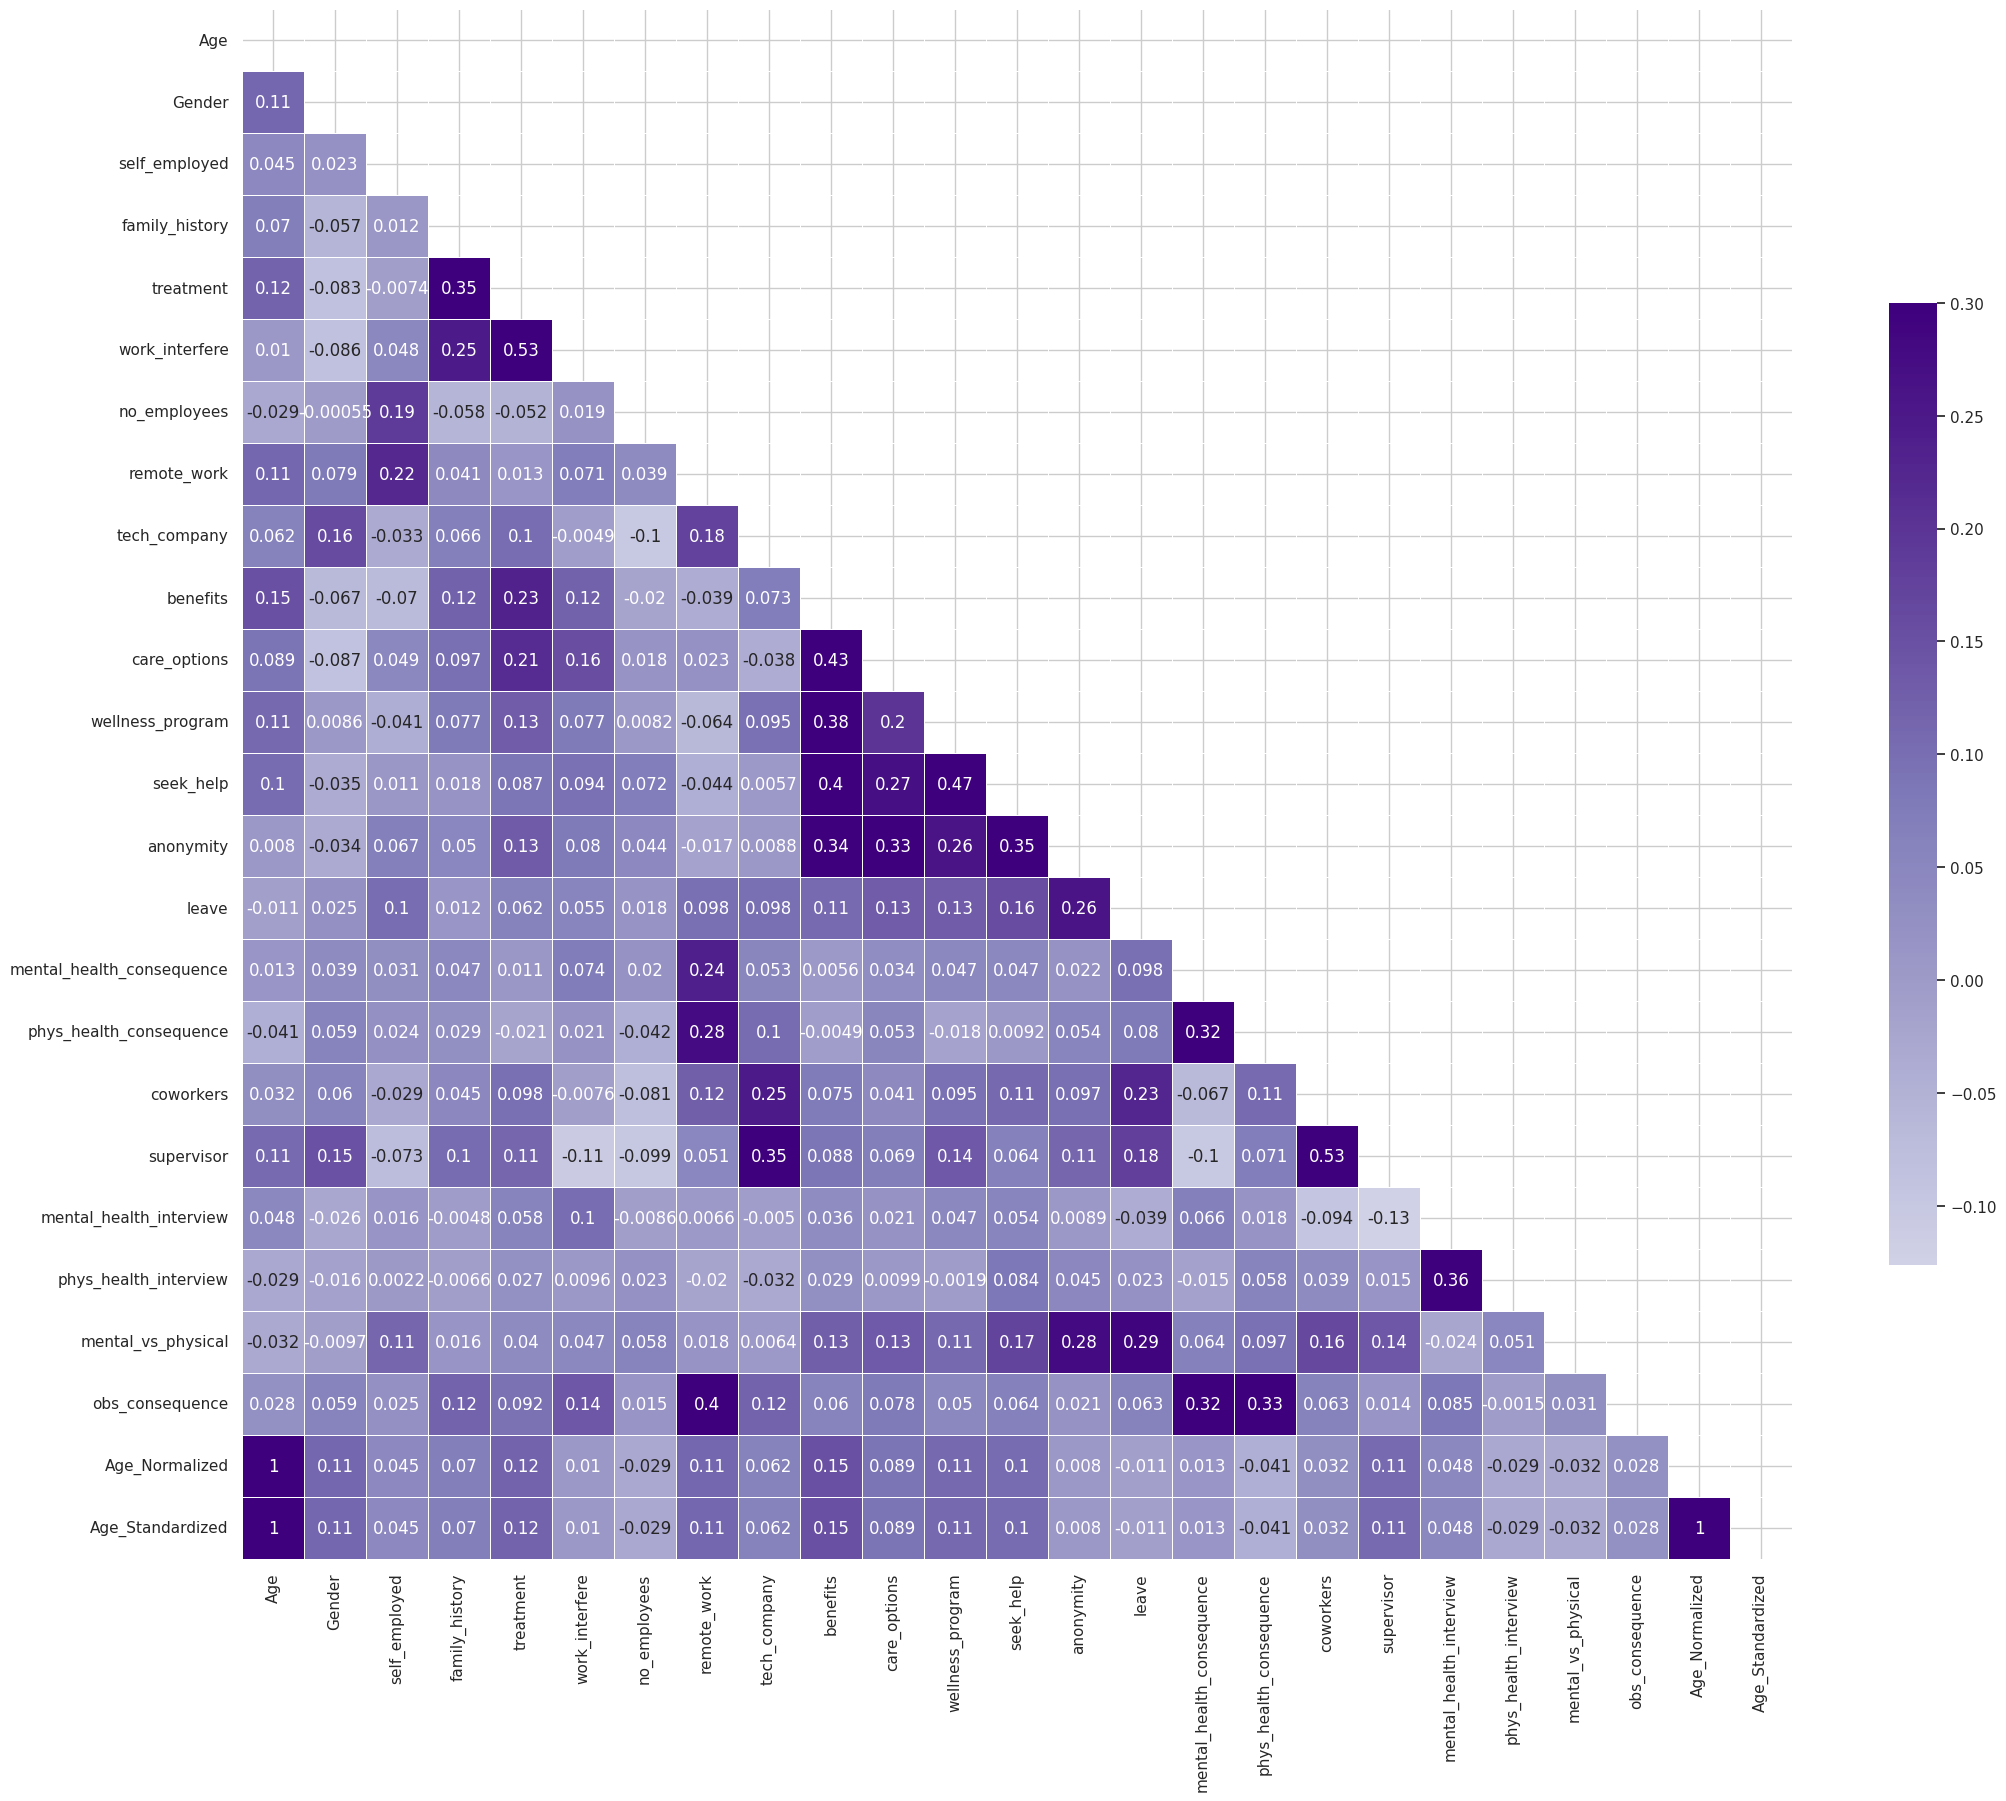

In [365]:
# We can see that the target column, i.e 'treatment' has almost equal values for both the categories.
# This means that we do not have to perform undersampling or oversampling.
#correlation matrix
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25, 25))

# The heatmap with the mask and correct ratio
sns.heatmap(corr, mask=mask, cmap='Purples', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1490 entries, 0 to 1495
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1490 non-null   int64  
 1   Gender                     1490 non-null   int64  
 2   self_employed              1490 non-null   int64  
 3   family_history             1490 non-null   int64  
 4   treatment                  1490 non-null   int64  
 5   work_interfere             1490 non-null   int64  
 6   no_employees               1490 non-null   int64  
 7   remote_work                1490 non-null   int64  
 8   tech_company               1490 non-null   int64  
 9   benefits                   1490 non-null   int64  
 10  care_options               1490 non-null   int64  
 11  wellness_program           1490 non-null   int64  
 12  seek_help                  1490 non-null   int64  
 13  anonymity                  1490 non-null   int64

In [367]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

key = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier',]
value = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 2, weights ='uniform'), DecisionTreeClassifier(random_state=10), RandomForestClassifier(n_estimators=60, random_state=0), GradientBoostingClassifier(random_state=20)]
models = dict(zip(key,value))
models

{'LogisticRegression': LogisticRegression(),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=60, random_state=0),
 'GradientBoostingClassifier': GradientBoostingClassifier(random_state=20)}

In [368]:
from sklearn.model_selection import train_test_split
X = df.drop('treatment', axis = 1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                    test_size = 0.3,
                                                   random_state = 101)

In [369]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.7829977628635347
KNeighborsClassifier 0.6599552572706935
DecisionTreeClassifier 0.767337807606264
RandomForestClassifier 0.8053691275167785
GradientBoostingClassifier 0.8232662192393736


In [370]:
from sklearn.ensemble import GradientBoostingClassifier

# 'treatment' is actual output feature
actual_output = df['treatment']

# 'features' is a DataFrame containing the features you used for prediction
features = df.drop('treatment', axis=1)

# Train a GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=20)
model.fit(features, actual_output)

# Make predictions
predicted_output = model.predict(features)

# Create a new column for predicted output
df['predicted_treatment'] = predicted_output

# Display the DataFrame with the new column
print(df[['treatment', 'predicted_treatment']])

      treatment  predicted_treatment
0             1                    1
1             0                    0
2             0                    1
3             1                    1
4             0                    0
...         ...                  ...
1491          0                    0
1492          0                    0
1493          0                    0
1494          0                    0
1495          0                    0

[1490 rows x 2 columns]


In [371]:
df[['Age','Gender','treatment', 'predicted_treatment']].head(57)

,Age,Gender,treatment,predicted_treatment
0,37,0,1,1
1,44,1,0,0
2,32,1,0,1
3,31,1,1,1
4,31,1,0,0
5,33,1,0,1
6,35,0,1,1
7,39,1,0,0
8,42,0,1,1
9,23,1,0,0


In [372]:
df[['Age','Gender','treatment', 'predicted_treatment']].tail(57)

,Age,Gender,treatment,predicted_treatment
1439,38,1,0,0
1440,22,0,0,0
1441,50,1,0,0
1442,23,0,0,0
1443,24,0,0,0
1444,20,1,0,0
1445,20,1,0,0
1446,22,1,0,0
1447,23,1,0,0
1448,23,0,0,0


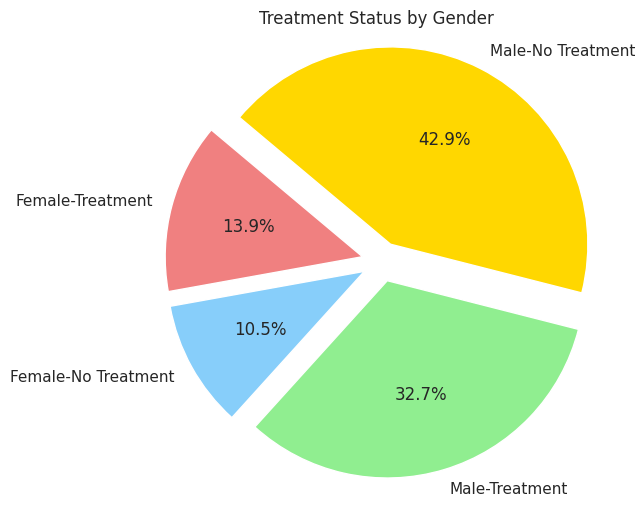

In [373]:
# Calculate the counts for each category
female_treatment_count = len(female_treatment_data)
female_not_treatment_count = len(female_data) - female_treatment_count
male_treatment_count = len(male_treatment_data)
male_not_treatment_count = len(male_data) - male_treatment_count

# Data to plot
labels = 'Female-Treatment', 'Female-No Treatment', 'Male-Treatment', 'Male-No Treatment'
sizes = [female_treatment_count, female_not_treatment_count, male_treatment_count, male_not_treatment_count]
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'gold']
explode = (0.1, 0.1, 0.1, 0.1)  # explode a slice if needed

# Plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Treatment Status by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

Text(41.25, 0.5, 'Actual')

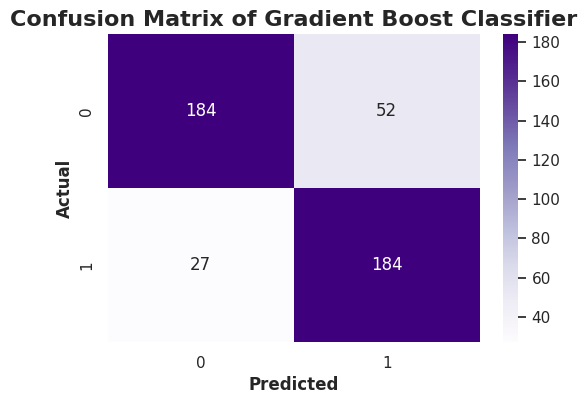

In [374]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
pred = gbc.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix of Gradient Boost Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

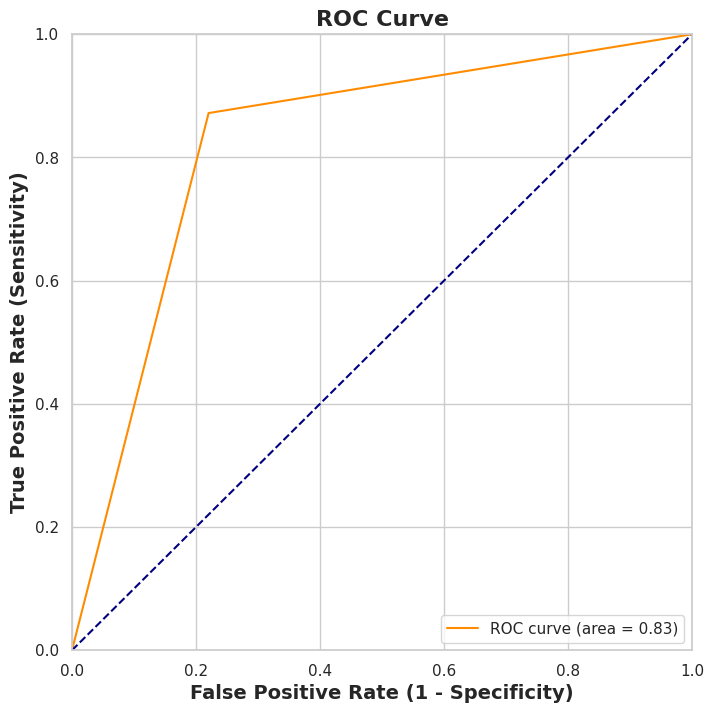

(array([0.        , 0.22033898, 1.        ]),
 array([0.        , 0.87203791, 1.        ]),
 array([2, 1, 0]))

In [375]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
plt.figure(figsize=(8,8))
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()
metrics.roc_curve(y_test, pred)

In [376]:
#Soft Voting

# List to store the predicted probability columns
predicted_prob_columns = []

# Iterate through models
for model_name, model in models.items():
    # Predict probabilities
    predicted_probabilities = model.predict_proba(features)[:, 1]

    # Create a new column for predicted probabilities
    df[f'predicted_prob_{model_name}'] = predicted_probabilities

    # Add the column name to the list
    predicted_prob_columns.append(f'predicted_prob_{model_name}')

# Soft Voting
df['soft_voting'] = df[predicted_prob_columns].mean(axis=1)

# Set the threshold (you can adjust this value)
threshold = 0.5

# Apply the threshold to get the final prediction
df['soft_voting_prediction'] = (df['soft_voting'] > threshold).astype(int)

# Display the DataFrame with the new columns
print(df[['treatment'] + predicted_prob_columns + ['soft_voting', 'soft_voting_prediction']])

      treatment  predicted_prob_LogisticRegression  \
0             1                           0.516992   
1             0                           0.323768   
2             0                           0.532012   
3             1                           0.549631   
4             0                           0.227690   
...         ...                                ...   
1491          0                           0.109451   
1492          0                           0.025913   
1493          0                           0.517726   
1494          0                           0.764024   
1495          0                           0.299061   

      predicted_prob_KNeighborsClassifier  \
0                                     1.0   
1                                     0.0   
2                                     1.0   
3                                     1.0   
4                                     0.0   
...                                   ...   
1491                                

In [377]:
#Hard Voting

models = {
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=60, random_state=0),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=20)
}

# 'treatment' is actual output feature
actual_output = df['treatment']

# Create columns for predicted output and probability values of each model
predicted_prob_columns = []

for name, model in models.items():
    # Train the model
    model.fit(features, actual_output)

    # Create a new column for predicted probabilities
    prob_values = model.predict_proba(features)[:, 1]
    predicted_prob_columns.append(f'predicted_{name}_prob')
    df[f'predicted_{name}_prob'] = prob_values

# Hard Voting
df['hard_voting_prediction'] = (df[predicted_prob_columns] >= 0.5).astype(int).sum(axis=1)
df['hard_voting_prediction'] = (df['hard_voting_prediction'] > len(models) / 2).astype(int)

# Display the DataFrame with the new columns
print(df[['treatment'] + predicted_prob_columns + ['hard_voting_prediction']])

      treatment  predicted_LogisticRegression_prob  \
0             1                           0.521887   
1             0                           0.299424   
2             0                           0.573220   
3             1                           0.511479   
4             0                           0.270006   
...         ...                                ...   
1491          0                           0.093509   
1492          0                           0.021270   
1493          0                           0.578178   
1494          0                           0.694237   
1495          0                           0.367659   

      predicted_KNeighborsClassifier_prob  \
0                                     1.0   
1                                     0.0   
2                                     0.5   
3                                     1.0   
4                                     0.0   
...                                   ...   
1491                                

In [378]:
#Boosting technique(AdaBoost)

# Initialize initial_weights
df['initial_weights'] = 1 / len(df)

# Calculate the error rate
df['Correct?'] = (df['treatment'] == df['predicted_treatment']).apply(lambda x: 'Yes' if x else 'No')
error_rate = df[df['Correct?'] == 'No']['initial_weights'].sum()

# Calculate predictor weight
predictor_weight = 0.5 * (1 - error_rate) / error_rate

# Update weights
df['update_weight'] = df.apply(lambda row: row['initial_weights'] *
                               (predictor_weight if row['Correct?'] == 'No' else 1), axis=1)

# Normalize weights to sum to 1
total_weight = df['update_weight'].sum()
df['normalized_weights'] = df['update_weight'] / total_weight

# Display the DataFrame with the new columns
print(df[['treatment', 'predicted_treatment','Correct?', 'initial_weights', 'update_weight', 'normalized_weights']])

# Display the Error rate and Predictor Weight
print(f"Error rate: {error_rate}")
print(f"Predictor Weight: {predictor_weight}")

      treatment  predicted_treatment Correct?  initial_weights  update_weight  \
0             1                    1      Yes         0.000671       0.000671   
1             0                    0      Yes         0.000671       0.000671   
2             0                    1       No         0.000671       0.002324   
3             1                    1      Yes         0.000671       0.000671   
4             0                    0      Yes         0.000671       0.000671   
...         ...                  ...      ...              ...            ...   
1491          0                    0      Yes         0.000671       0.000671   
1492          0                    0      Yes         0.000671       0.000671   
1493          0                    0      Yes         0.000671       0.000671   
1494          0                    0      Yes         0.000671       0.000671   
1495          0                    0      Yes         0.000671       0.000671   

      normalized_weights  


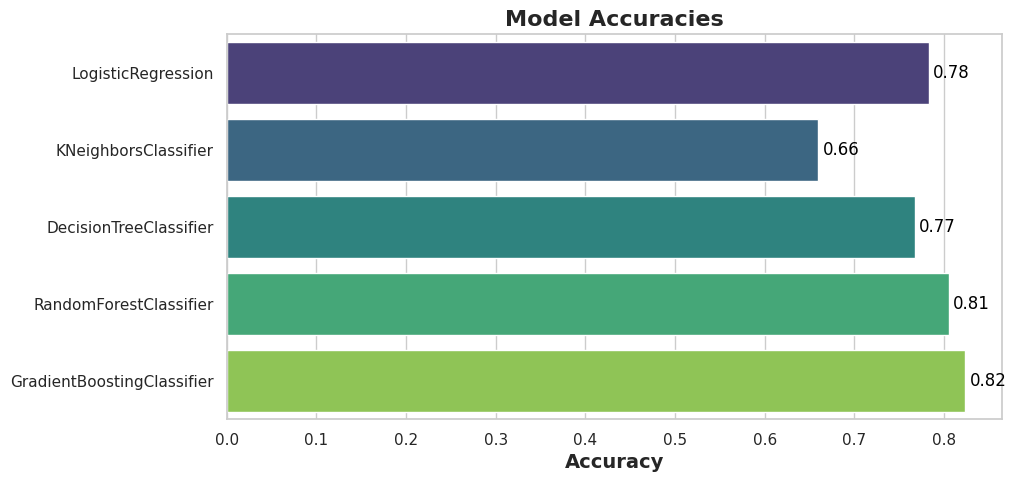

In [379]:
# Model names and their accuracy scores
models = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']
accuracies = [0.7829977628635347, 0.6599552572706935, 0.767337807606264, 0.8053691275167785, 0.8232662192393736]

# Create a bar plot for accuracies with seaborn
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")  # Set a whitegrid background for better readability
ax = sns.barplot(x=accuracies, y=models, palette='viridis')  # Change the color palette

# Set the x-axis label to "Accuracy"
plt.xlabel("Accuracy", fontsize=14, fontweight="bold")

# Add labels to the bars with adjusted positioning
for i, v in enumerate(accuracies):
    ax.text(v + 0.005, i, f'{v:.2f}', color='black', va='center', fontsize=12)

# Set the title
plt.title("Model Accuracies", fontsize=16, fontweight="bold")

# Show the plot
plt.show()